In [ ]:
#%%

import scanpy as sc
import os

In [ ]:
#%%

ori_path = "/group/testa/Project/OvarianAtlasTestStep0/raw_data/integration/cells/cancer/cells_hdg_patients_batch_corr_scgen_tissuetreat_embeddings_HDG.h5ad"
adata = sc.read_h5ad(ori_path)

In [ ]:
# %%

ori_path = "/group/testa/Project/OvarianAtlas/atlas_project/raw_data/integration_backup/integration/cells/cancer/cells_hdg_patients_batch_corr_scgen_tissuetreat_embeddings_HDG.h5ad"
adata_ma = sc.read_h5ad(ori_path)

In [ ]:
# %%

step0_path = "/group/testa/Project/OvarianAtlasTestStep0/raw_data/integration/cells/cancer/cells_hdg_patients_batch_corr_scgen_tissuetreat_embeddings_HDG.h5ad"
step0_adata = sc.read_h5ad(step0_path)

In [ ]:
#%%

new_path = "/group/testa/Project/OvarianAtlasTestStep0/raw_data/metacells/cancer"
rels = {"seacells_assignment_hdg_patients_marta.h5ad", "seacells_assignment_hdg_patients_seed_2.h5ad"}
seed_adatas = [sc.read_h5ad(os.path.join(new_path, rel)) for rel in rels]

In [ ]:
#%%

# adata_ma.obs["SEACell2"] = step0_path.obs["SEACell"]
# adata_ma.obs['SEACell_patient_tissue'] = adata_ma.obs['SEACell'].astype('str') + '_' + adata_ma.obs['paper_ID'].astype('str') + '_' + adata_ma.obs['tissue'].astype('str')
# adata_ma.obs['SEACell2_patient_tissue'] = adata_ma.obs['SEACell2'].astype('str') + '_' + adata_ma.obs['paper_ID'].astype('str') + '_' + adata_ma.obs['tissue'].astype('str')

def copy_seacell(adata, adata2, name):
    adata.obs[name] = adata2.obs["SEACell"]
    adata.obs[name + '_patient_tissue'] = adata.obs[name].astype('str') + '_' + adata.obs['paper_ID'].astype('str') + '_' + adata.obs['tissue'].astype('str')

adata_ma.obs['SEACell_patient_tissue'] = adata_ma.obs['SEACell'].astype('str') + '_' + adata_ma.obs['paper_ID'].astype('str') + '_' + adata_ma.obs['tissue'].astype('str')
# copy_seacell(adata_ma, step0_adata, "SEACell2")
copy_seacell(adata_ma, seed_adatas[0], "SEACell_seed1")
copy_seacell(adata_ma, seed_adatas[1], "SEACell_seed2")
copy_seacell(adata_ma, seed_adatas[2], "SEACell_seed3")

IndexError: list index out of range

In [ ]:
# %%

import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

: 

In [ ]:
#%%

import pandas as pd
def celltype_frac(x, col_name):
    val_counts = x[col_name].value_counts()
    return val_counts.values[0] / val_counts.values.sum()


def compute_celltype_purity(ad, col_name):
    """
    Compute the purity (prevalence of most abundant value) of the specified col_name from ad.obs within each metacell.
    @param: ad - AnnData object with SEACell assignment and col_name in ad.obs dataframe
    @param: col_name - (str) column name within ad.obs representing celltype groupings for each cell.
    """

    celltype_fraction = ad.obs.groupby('SEACell_patient_tissue').apply(lambda x: celltype_frac(x, col_name))
    celltype = ad.obs.groupby('SEACell_patient_tissue').apply(lambda x: x[col_name].value_counts().index[0])

    return pd.concat([celltype, celltype_fraction], axis=1).rename(columns={0: col_name, 1: f'{col_name}_purity'})

: 

In [ ]:
#%%

purity = compute_celltype_purity(adata_ma, "SEACell2_patient_tissue")

: 

In [ ]:
# %%

adata_ma_na = adata_ma[~adata_ma.obs.SEACell.isna(), :]
purity_na = compute_celltype_purity(adata_ma_na, "SEACell2_patient_tissue")

: 

In [ ]:
# %%

purity_seed1 = compute_celltype_purity(adata_ma, "SEACell_seed1_patient_tissue")
purity_seed2 = compute_celltype_purity(adata_ma, "SEACell_seed2_patient_tissue")
purity_seed3 = compute_celltype_purity(adata_ma, "SEACell_seed3_patient_tissue")

: 

In [ ]:
# %%

def compute_celltype_purity(ad, col_name, starting):
    """
    Compute the purity (prevalence of most abundant value) of the specified col_name from ad.obs within each metacell.
    @param: ad - AnnData object with SEACell assignment and col_name in ad.obs dataframe
    @param: col_name - (str) column name within ad.obs representing celltype groupings for each cell.
    """

    celltype_fraction = ad.obs.groupby(starting).apply(lambda x: celltype_frac(x, col_name))
    celltype = ad.obs.groupby(starting).apply(lambda x: x[col_name].value_counts().index[0])

    return pd.concat([celltype, celltype_fraction], axis=1).rename(columns={0: col_name, 1: f'{col_name}_purity'})

: 

In [ ]:
# %%

purity_seed1 = compute_celltype_purity(adata_ma, "SEACell_seed1_patient_tissue",  "SEACell_seed1_patient_tissue")
purity_seed2 = compute_celltype_purity(adata_ma, "SEACell_seed2_patient_tissue",  "SEACell_seed1_patient_tissue")
purity_seed3 = compute_celltype_purity(adata_ma, "SEACell_seed3_patient_tissue",  "SEACell_seed1_patient_tissue")

: 

In [ ]:
# %%

ori_path = "/group/testa/Project/OvarianAtlas/atlas_project/raw_data/metacells_backup/metacells/cancer/seacells_assignment_hdg_patients.h5ad"
adata_ma = sc.read_h5ad(ori_path)

: 

In [ ]:
adata.obs

,tissue,developmental_stage,treatment,recurrence,tumor_stage,paper_ID,anatomical_location,dataset,n_genes,n_genes_by_counts,...,max,cell_types,SEACell,tissue-treatment,_scvi_batch,_scvi_labels,concat_batch,S_score,G2M_score,phase
AAACCTGAGACTTGAA-1-T59,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,599,599,...,CancerMSK,CancerMSK,SEACell-7,Metastasis_CHT,0,3,0,-0.003934,-0.035056,G1
AAACCTGCACACCGCA-1-T59,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,6225,6225,...,CancerMSK,CancerMSK,SEACell-3,Metastasis_CHT,0,3,0,0.020012,0.003426,S
AAACCTGTCCGGCACA-1-T59,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,513,513,...,CancerMSK,CancerMSK,SEACell-7,Metastasis_CHT,0,3,0,-0.015525,-0.026617,G1
AAACCTGTCGGCGGTT-1-T59,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,1542,1542,...,CancerMSK,CancerMSK,SEACell-2,Metastasis_CHT,0,3,0,-0.036711,-0.051121,G1
AAACGGGAGGCACATG-1-T59,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,1555,1555,...,CancerMSK,CancerMSK,SEACell-6,Metastasis_CHT,0,3,0,-0.022536,-0.015806,G1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTTGGTTTCTGGGCCA,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,Vasquez,2214,2214,...,CancerMSK,CancerMSK,SEACell-108,Metastasis_Naive,60,5,0,0.008888,-0.058712,S
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTTGTTGAGGTCTGGA,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,Vasquez,2387,2387,...,CancerMSK,CancerMSK,SEACell-42,Metastasis_Naive,60,5,0,-0.046429,-0.089719,G1
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTTGTTGCACGTCTCT,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,Vasquez,1003,1003,...,CancerMSK,CancerMSK,SEACell-117,Metastasis_Naive,60,5,0,0.016156,-0.047764,S
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTTGTTGCACTTGAAC,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,Vasquez,1875,1875,...,CancerMSK,CancerMSK,SEACell-45,Metastasis_Naive,60,5,0,-0.014554,-0.077061,G1


In [ ]:
adata_ma

AnnData object with n_obs × n_vars = 401106 × 5192
    obs: 'ID', 'sample_name', 'tissue', 'developmental_stage', 'treatment', 'recurrence', 'tumor_stage', 'paper_ID', 'anatomical_location', 'patient_id', 'dataset', 'cell_type', 'cell_subtype', 'sample_ID', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'CancerMSK', 'EndothelialMSK', 'FibroblastsMSK', 'HematopoieticMSK', 'cell_labels_ratio', 'max', 'assignment', 'leiden-1.8', 'SEACell', 'tissue-treatment', '_scvi_batch', '_scvi_labels', 'concat_batch', 'S_score', 'G2M_score', 'phase', 'SEACell_patient_tissue', 'SEACell_seed1', 'SEACell_seed1_patient_tissue', 'SEACell_seed2', 'SEACell_seed2_patient_tissue'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'dataset_colors', 'neighbors', 'paper_ID_colors', 'pca', 'phase_colors', 'tissue-treatment_colors', 'tissue_colors', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap', 'corrected_latent', 'latent'
    varm: 'PCs'
    obsp: 'connectivities', 'distanc

In [ ]:
# %%

import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [ ]:
#%%

import pandas as pd
def celltype_frac(x, col_name):
    val_counts = x[col_name].value_counts()
    return val_counts.values[0] / val_counts.values.sum()


def compute_celltype_purity(ad, col_name):
    """
    Compute the purity (prevalence of most abundant value) of the specified col_name from ad.obs within each metacell.
    @param: ad - AnnData object with SEACell assignment and col_name in ad.obs dataframe
    @param: col_name - (str) column name within ad.obs representing celltype groupings for each cell.
    """

    celltype_fraction = ad.obs.groupby('SEACell_patient_tissue').apply(lambda x: celltype_frac(x, col_name))
    celltype = ad.obs.groupby('SEACell_patient_tissue').apply(lambda x: x[col_name].value_counts().index[0])

    return pd.concat([celltype, celltype_fraction], axis=1).rename(columns={0: col_name, 1: f'{col_name}_purity'})

In [ ]:
#%%

purity = compute_celltype_purity(adata_ma, "SEACell2_patient_tissue")

KeyError: 'SEACell2_patient_tissue'

In [ ]:
# %%

purity_seed1 = compute_celltype_purity(adata_ma, "SEACell_seed1_patient_tissue")
purity_seed2 = compute_celltype_purity(adata_ma, "SEACell_seed2_patient_tissue")
#purity_seed3 = compute_celltype_purity(adata_ma, "SEACell_seed3_patient_tissue")

<ipython-input-10-20d7f649aeed>:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  celltype_fraction = ad.obs.groupby('SEACell_patient_tissue').apply(lambda x: celltype_frac(x, col_name))
<ipython-input-10-20d7f649aeed>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  celltype = ad.obs.groupby('SEACell_patient_tissue').apply(lambda x: x[col_name].value_counts().index[0])
<ipython-input-10-20d7f649aeed>:15: 

array([[<Axes: title={'center': 'SEACell_seed1_patient_tissue_purity'}>]],
      dtype=object)

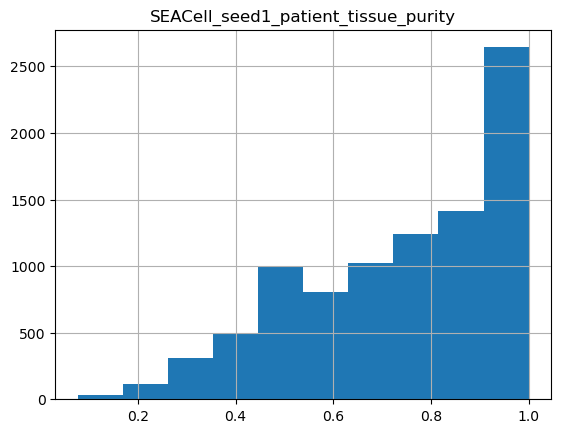

In [ ]:
purity_seed1.hist()

array([[<Axes: title={'center': 'SEACell_seed2_patient_tissue_purity'}>]],
      dtype=object)

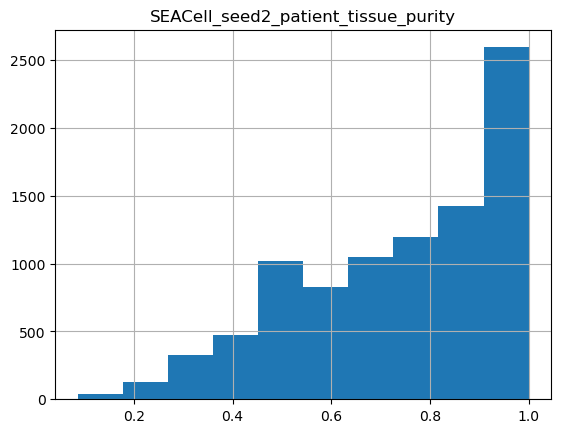

In [ ]:
purity_seed2.hist()

In [ ]:
# %%

def compute_celltype_purity(ad, col_name, starting):
    """
    Compute the purity (prevalence of most abundant value) of the specified col_name from ad.obs within each metacell.
    @param: ad - AnnData object with SEACell assignment and col_name in ad.obs dataframe
    @param: col_name - (str) column name within ad.obs representing celltype groupings for each cell.
    """

    celltype_fraction = ad.obs.groupby(starting).apply(lambda x: celltype_frac(x, col_name))
    celltype = ad.obs.groupby(starting).apply(lambda x: x[col_name].value_counts().index[0])

    return pd.concat([celltype, celltype_fraction], axis=1).rename(columns={0: col_name, 1: f'{col_name}_purity'})

In [ ]:
# %%

purity_seed1 = compute_celltype_purity(adata_ma, "SEACell_seed1_patient_tissue",  "SEACell_seed1_patient_tissue")
purity_seed2 = compute_celltype_purity(adata_ma, "SEACell_seed2_patient_tissue",  "SEACell_seed1_patient_tissue")
#purity_seed3 = compute_celltype_purity(adata_ma, "SEACell_seed3_patient_tissue",  "SEACell_seed1_patient_tissue")

<ipython-input-15-e486e53fe515>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  celltype_fraction = ad.obs.groupby(starting).apply(lambda x: celltype_frac(x, col_name))
<ipython-input-15-e486e53fe515>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  celltype = ad.obs.groupby(starting).apply(lambda x: x[col_name].value_counts().index[0])
<ipython-input-15-e486e53fe515>:9: DeprecationWarning: DataFrameGroup

In [ ]:
purity_seed1

,SEACell_seed1_patient_tissue,SEACell_seed1_patient_tissue_purity
SEACell_seed1_patient_tissue,,
SEACell-0_Geistlinger_59_Metastasis,SEACell-0_Geistlinger_59_Metastasis,1.0
SEACell-0_Geistlinger_76_Metastasis,SEACell-0_Geistlinger_76_Metastasis,1.0
SEACell-0_Geistlinger_77_Metastasis,SEACell-0_Geistlinger_77_Metastasis,1.0
SEACell-0_Geistlinger_89_Metastasis,SEACell-0_Geistlinger_89_Metastasis,1.0
SEACell-0_Loret_1_Ascites,SEACell-0_Loret_1_Ascites,1.0
...,...,...
nan_Zhang_349_Metastasis,nan_Zhang_349_Metastasis,1.0
nan_Zhang_372_Metastasis,nan_Zhang_372_Metastasis,1.0
nan_Zhang_3_Metastasis,nan_Zhang_3_Metastasis,1.0


array([[<Axes: title={'center': 'SEACell_seed1_patient_tissue_purity'}>]],
      dtype=object)

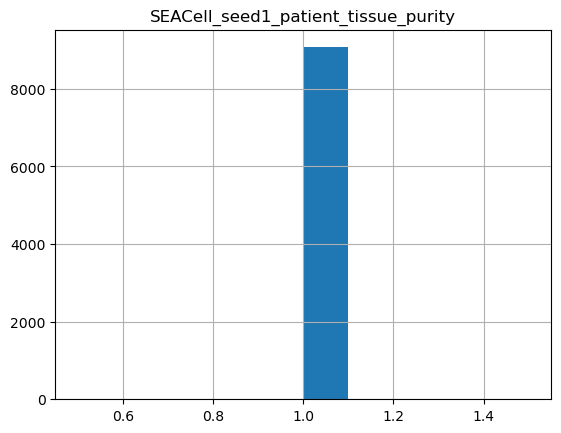

In [ ]:
purity_seed1.hist()